In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the uploaded Titanic dataset
df = pd.read_csv(r"C:\Users\user\Desktop\8 steps revamp\Titanic Dataset.csv")

# Preview the first few rows
df.head()

# Check info and summary
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
df_clean = df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'])
df_clean = df_clean.dropna()

print(f"Shape before cleaning: {df.shape}")
print(f"Shape after cleaning: {df_clean.shape}")

Shape before cleaning: (418, 12)
Shape after cleaning: (331, 8)


In [11]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
sns.set(style="whitegrid")

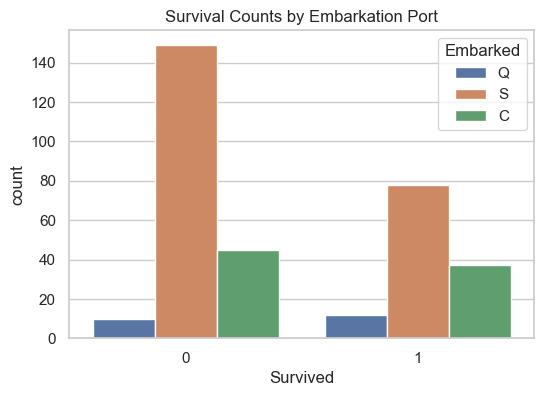

Survival rate by Embarked:
Embarked
C    0.451220
Q    0.545455
S    0.343612
Name: Survived, dtype: float64


In [15]:
# 1. Survival by Embarkation Port
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', hue='Embarked', data=df_clean)
plt.title("Survival Counts by Embarkation Port")
plt.show()

print("Survival rate by Embarked:")
print(df_clean.groupby('Embarked')['Survived'].mean())

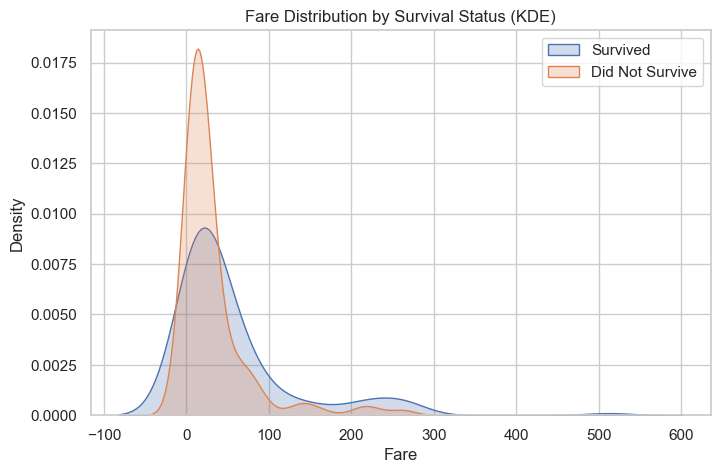

Average fare by survival status:
Survived
0    31.688071
1    55.911058
Name: Fare, dtype: float64


In [26]:
# 2. Fare Paid vs Survival
plt.figure(figsize=(8,5))
sns.kdeplot(df_clean.loc[df_clean['Survived']==1, 'Fare'], label='Survived', fill=True)
sns.kdeplot(df_clean.loc[df_clean['Survived']==0, 'Fare'], label='Did Not Survive', fill=True)
plt.title("Fare Distribution by Survival Status (KDE)")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.legend()
plt.show()


print("Average fare by survival status:")
print(df_clean.groupby('Survived')['Fare'].mean())

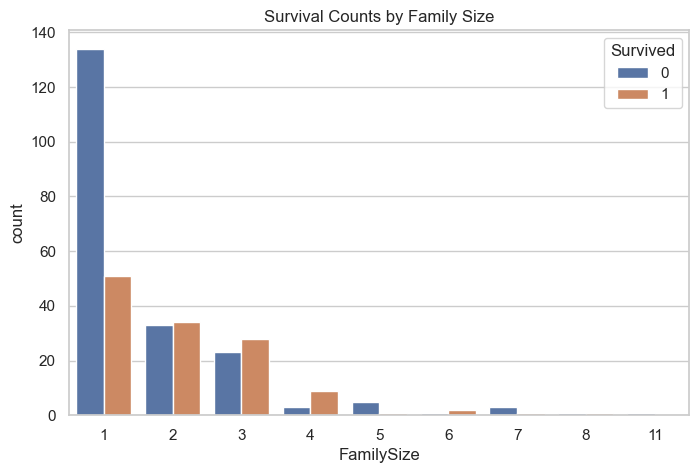

In [32]:
# 3. Family Size Effect
df_clean['FamilySize'] = df_clean['SibSp'] + df_clean['Parch'] + 1  # including self

plt.figure(figsize=(8,5))
sns.countplot(x='FamilySize', hue='Survived', data=df_clean)
plt.title("Survival Counts by Family Size")
plt.show()

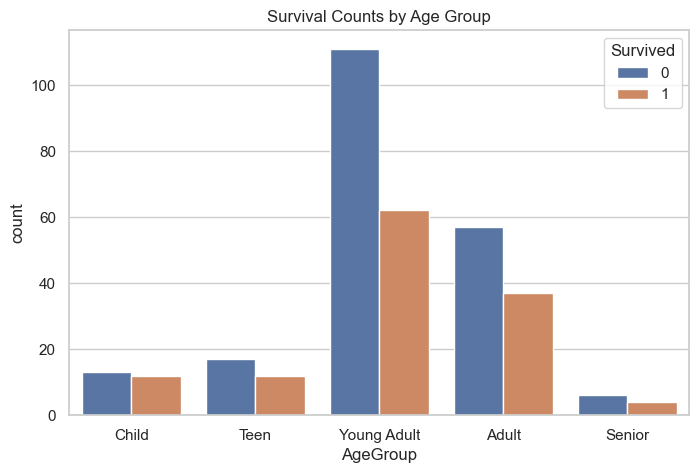

In [34]:
# 4. Survival by Age Groups
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=bins, labels=labels)

plt.figure(figsize=(8,5))
sns.countplot(x='AgeGroup', hue='Survived', data=df_clean)
plt.title("Survival Counts by Age Group")
plt.show()

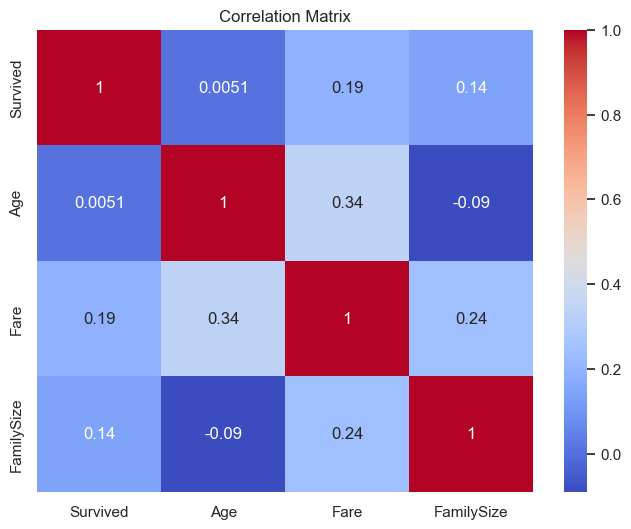

In [36]:
# 5. Correlation Matrix
plt.figure(figsize=(8,6))
sns.heatmap(df_clean[['Survived','Age','Fare','FamilySize']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()